In [1]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd

#Sigam o tutorial que eu mandei pra entender como pega essa parte
#Esse aqui: https://medium.com/@maxtingle/getting-started-with-spotifys-api-spotipy-197c3dc6353b
cid = 'Your Client ID'
secret = 'Your Secret ID'

#Habilitação pro uso das funções
client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [2]:
#Teste pra ver como funciona o negócio
#No caso, peguei 20 músicas da pabllo
results = sp.search(q='pabllo vittar', limit=20)
for idx, track in enumerate(results['tracks']['items']):
    print(idx, track['name'])

0 MODO TURBO
1 Fun Tonight - Pabllo Vittar Remix
2 Corpo Sensual
3 K.O.
4 MODO TURBO
5 I Got It (feat. Brooke Candy, CupcakKe and Pabllo Vittar)
6 Indestrutível
7 Number One
8 Shake It (feat. Big Freedia, CupcakKe, Brooke Candy and Pabllo Vittar)
9 Clima Quente
10 Bandida
11 Man's World (Empress Of Remix) [feat. Pabllo Vittar]
12 Tímida
13 Lento (feat. Pabllo Vittar) [Brabo Remix]
14 Amor de Que
15 MODO TURBO
16 Sua Cara
17 Seu Crime
18 Nêga
19 Problema Seu


In [3]:
#Aqui eu baixei as musicas mais tocadas no Brasil no Spotify para a ultima semana
#Baixei no link: https://spotifycharts.com/regional/br/weekly/latest
recent_chart = pd.read_csv('/home/ld_brito/CinUFPE/SiDi/Projeto2/datasets/regional-br-weekly-2021-11-26--2021-12-03.csv', header = 1)
print(recent_chart.shape)
recent_chart.head()

(200, 5)


,Position,Track Name,Artist,Streams,URL
0,1,Esqueça-Me Se For Capaz,Marília Mendonça,7297643,https://open.spotify.com/track/4qsOrxBv09HhNSp...
1,2,Vai Lá Em Casa Hoje,George Henrique & Rodrigo,6414627,https://open.spotify.com/track/1c4htMHiolERc0Y...
2,3,Todo Mundo Menos Você,Marília Mendonça,6069206,https://open.spotify.com/track/053zWWZDziDJd3U...
3,4,Presepada,Marília Mendonça,5954490,https://open.spotify.com/track/3YvE7uo4ffseBoJ...
4,5,Arranhão - Ao Vivo,Henrique & Juliano,5918296,https://open.spotify.com/track/4u06FbRh6FvV2FQ...


In [4]:
#Todo esse código serve para buscar o ID das músicas e criar um dataset inicial, com
#Nome do artista, Nome da música e ID


#Listas vazias
artist_name_list = []
track_name_list = []
track_id_list = []

#Começo da varredura por música
for track_name in recent_chart['Track Name']: 
    #Busca pelo nome da música e pego os 50 primeiros resultados com resultados sobre as músicas (é o máximo que a API permite)
    track_results = sp.search(q='track:'+str(track_name), type='track', limit=50)
    #Varredura pelos 50 resultados em busca da música que aparece no charts
    for idx, track in enumerate(track_results['tracks']['items']):
        #A que tiver o mesmo link pro spotify é adicionada às listas, pois o link é um identificador único
        if track['external_urls']['spotify'] == recent_chart[recent_chart['Track Name']==track_name].iloc[0]['URL']:
            artist_name_list.append(track['artists'][0]['name'])
            track_name_list.append(track['name'])
            track_id_list.append(track['id'])


In [5]:
# Montagem do dataset inicial
track_dataframe = pd.DataFrame({'artist_name' : artist_name_list, 'track_name' : track_name_list, 'track_id' : track_id_list})
print(track_dataframe.shape)
track_dataframe.head()

(196, 3)


,artist_name,track_name,track_id
0,Marília Mendonça,Esqueça-Me Se For Capaz,4qsOrxBv09HhNSpsgMRXdC
1,George Henrique & Rodrigo,Vai Lá Em Casa Hoje,1c4htMHiolERc0YJvZNdlc
2,Marília Mendonça,Todo Mundo Menos Você,053zWWZDziDJd3U94x8RuP
3,Marília Mendonça,Presepada,3YvE7uo4ffseBoJPh8IhHp
4,Henrique & Juliano,Arranhão - Ao Vivo,4u06FbRh6FvV2FQZkouzCw


In [6]:
#A porrada de lista vazia pra preencher
#Provavelmente tem um jeito mais otimizado mas eu não acertei
danceability = []
energy = []
key = []
loudness = []
mode = []
speechiness = []
acousticness = []
instrumentalness = []
liveness = []
valence = []
tempo = []
duration_ms = []
time_signature = []

#Varredura pela lista de IDs das músicas a append das features de audio
for tid in track_id_list:
    features = sp.audio_features(tid)
    danceability.append(features[0]['danceability'])
    energy.append(features[0]['energy'])
    key.append(features[0]['key'])
    loudness.append(features[0]['loudness'])
    mode.append(features[0]['mode'])
    speechiness.append(features[0]['speechiness'])
    acousticness.append(features[0]['acousticness'])
    instrumentalness.append(features[0]['instrumentalness'])
    liveness.append(features[0]['liveness'])
    valence.append(features[0]['valence'])
    tempo.append(features[0]['tempo'])
    duration_ms.append(features[0]['duration_ms'])
    time_signature.append(features[0]['time_signature'])


In [7]:
#Juntando essa bagunça toda em um dataframe
track_dataframe = pd.DataFrame({'artist_name' : artist_name_list, 'track_name' : track_name_list, 'track_id' : track_id_list,
                               'danceability' : danceability, 'energy': energy, 'key' : key, 'loudness': loudness,
                               'mode' : mode, 'speechiness' : speechiness, 'acousticness' : acousticness, 'instrumentalness' : instrumentalness,
                               'liveness' : liveness, 'valence' : valence, 'tempo' : tempo, 'duration_ms' : duration_ms, 'time_signature': time_signature})
print(track_dataframe.shape)
track_dataframe.head()

(196, 16)


,artist_name,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Marília Mendonça,Esqueça-Me Se For Capaz,4qsOrxBv09HhNSpsgMRXdC,0.799,0.685,6,-5.366,0,0.0725,0.276,0.0,0.130,0.623,122.013,169059,4
1,George Henrique & Rodrigo,Vai Lá Em Casa Hoje,1c4htMHiolERc0YJvZNdlc,0.456,0.830,8,-3.646,0,0.2810,0.530,0.0,0.968,0.619,157.628,191524,4
2,Marília Mendonça,Todo Mundo Menos Você,053zWWZDziDJd3U94x8RuP,0.778,0.641,7,-5.258,1,0.0449,0.753,0.0,0.104,0.434,131.914,206171,4
3,Marília Mendonça,Presepada,3YvE7uo4ffseBoJPh8IhHp,0.606,0.733,9,-4.460,1,0.1750,0.368,0.0,0.144,0.672,166.199,196210,4
4,Henrique & Juliano,Arranhão - Ao Vivo,4u06FbRh6FvV2FQZkouzCw,0.486,0.871,3,-3.642,0,0.2580,0.617,0.0,0.970,0.663,151.175,153410,4


<AxesSubplot:ylabel='Frequency'>

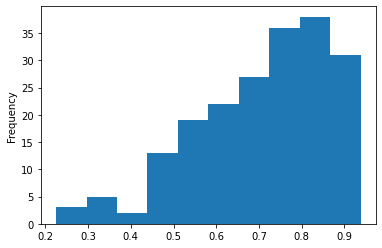

In [8]:
#Brincando de ver a distribuição das variáveis
track_dataframe['energy'].plot.hist()